# Ensemble Learning Project


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, PowerTransformer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# Reading the datasets
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test_final = pd.read_csv('X_test_final.csv')

In [9]:
france_dataset = pd.read_csv('france_dataset.csv')
germany_dataset = pd.read_csv('germany_dataset.csv')
training_dataset = pd.read_csv('training_dataset.csv')

In [11]:
print(training_dataset['COUNTRY'].value_counts())
print(training_dataset['COUNTRY'].value_counts(1))

FR    851
DE    643
Name: COUNTRY, dtype: int64
FR    0.569612
DE    0.430388
Name: COUNTRY, dtype: float64


## EDA

Thinking about the fundamental price drivers of electricity in each country may be useful.

### Univariate Analysis

In [12]:
# Grouping the features according their
commodities_weather_columns = ['GAS_RET',
                            'COAL_RET',
                            'CARBON_RET',
                            'DE_TEMP',
                            'FR_TEMP',
                            'DE_WIND',
                            'FR_WIND',
                            'DE_RAIN',
                            'FR_RAIN']

energy_columns = ['DE_GAS',
                            'FR_GAS',
                            'DE_COAL',
                            'FR_COAL',
                            'DE_HYDRO',
                            'FR_HYDRO',
                            'DE_NUCLEAR',
                            'FR_NUCLEAR',
                            'DE_SOLAR',
                            'FR_SOLAR',
                            'DE_WINDPOW',
                            'FR_WINDPOW',
                            'DE_LIGNITE']

electricity_columns = ['DE_CONSUMPTION',
                            'FR_CONSUMPTION',
                            'DE_RESIDUAL_LOAD',
                            'FR_RESIDUAL_LOAD',
                            'DE_NET_IMPORT',
                            'FR_NET_IMPORT',
                            'DE_NET_EXPORT',
                            'FR_NET_EXPORT',
                            'DE_FR_EXCHANGE',
                            'FR_DE_EXCHANGE']

##### Commodities price and weather features

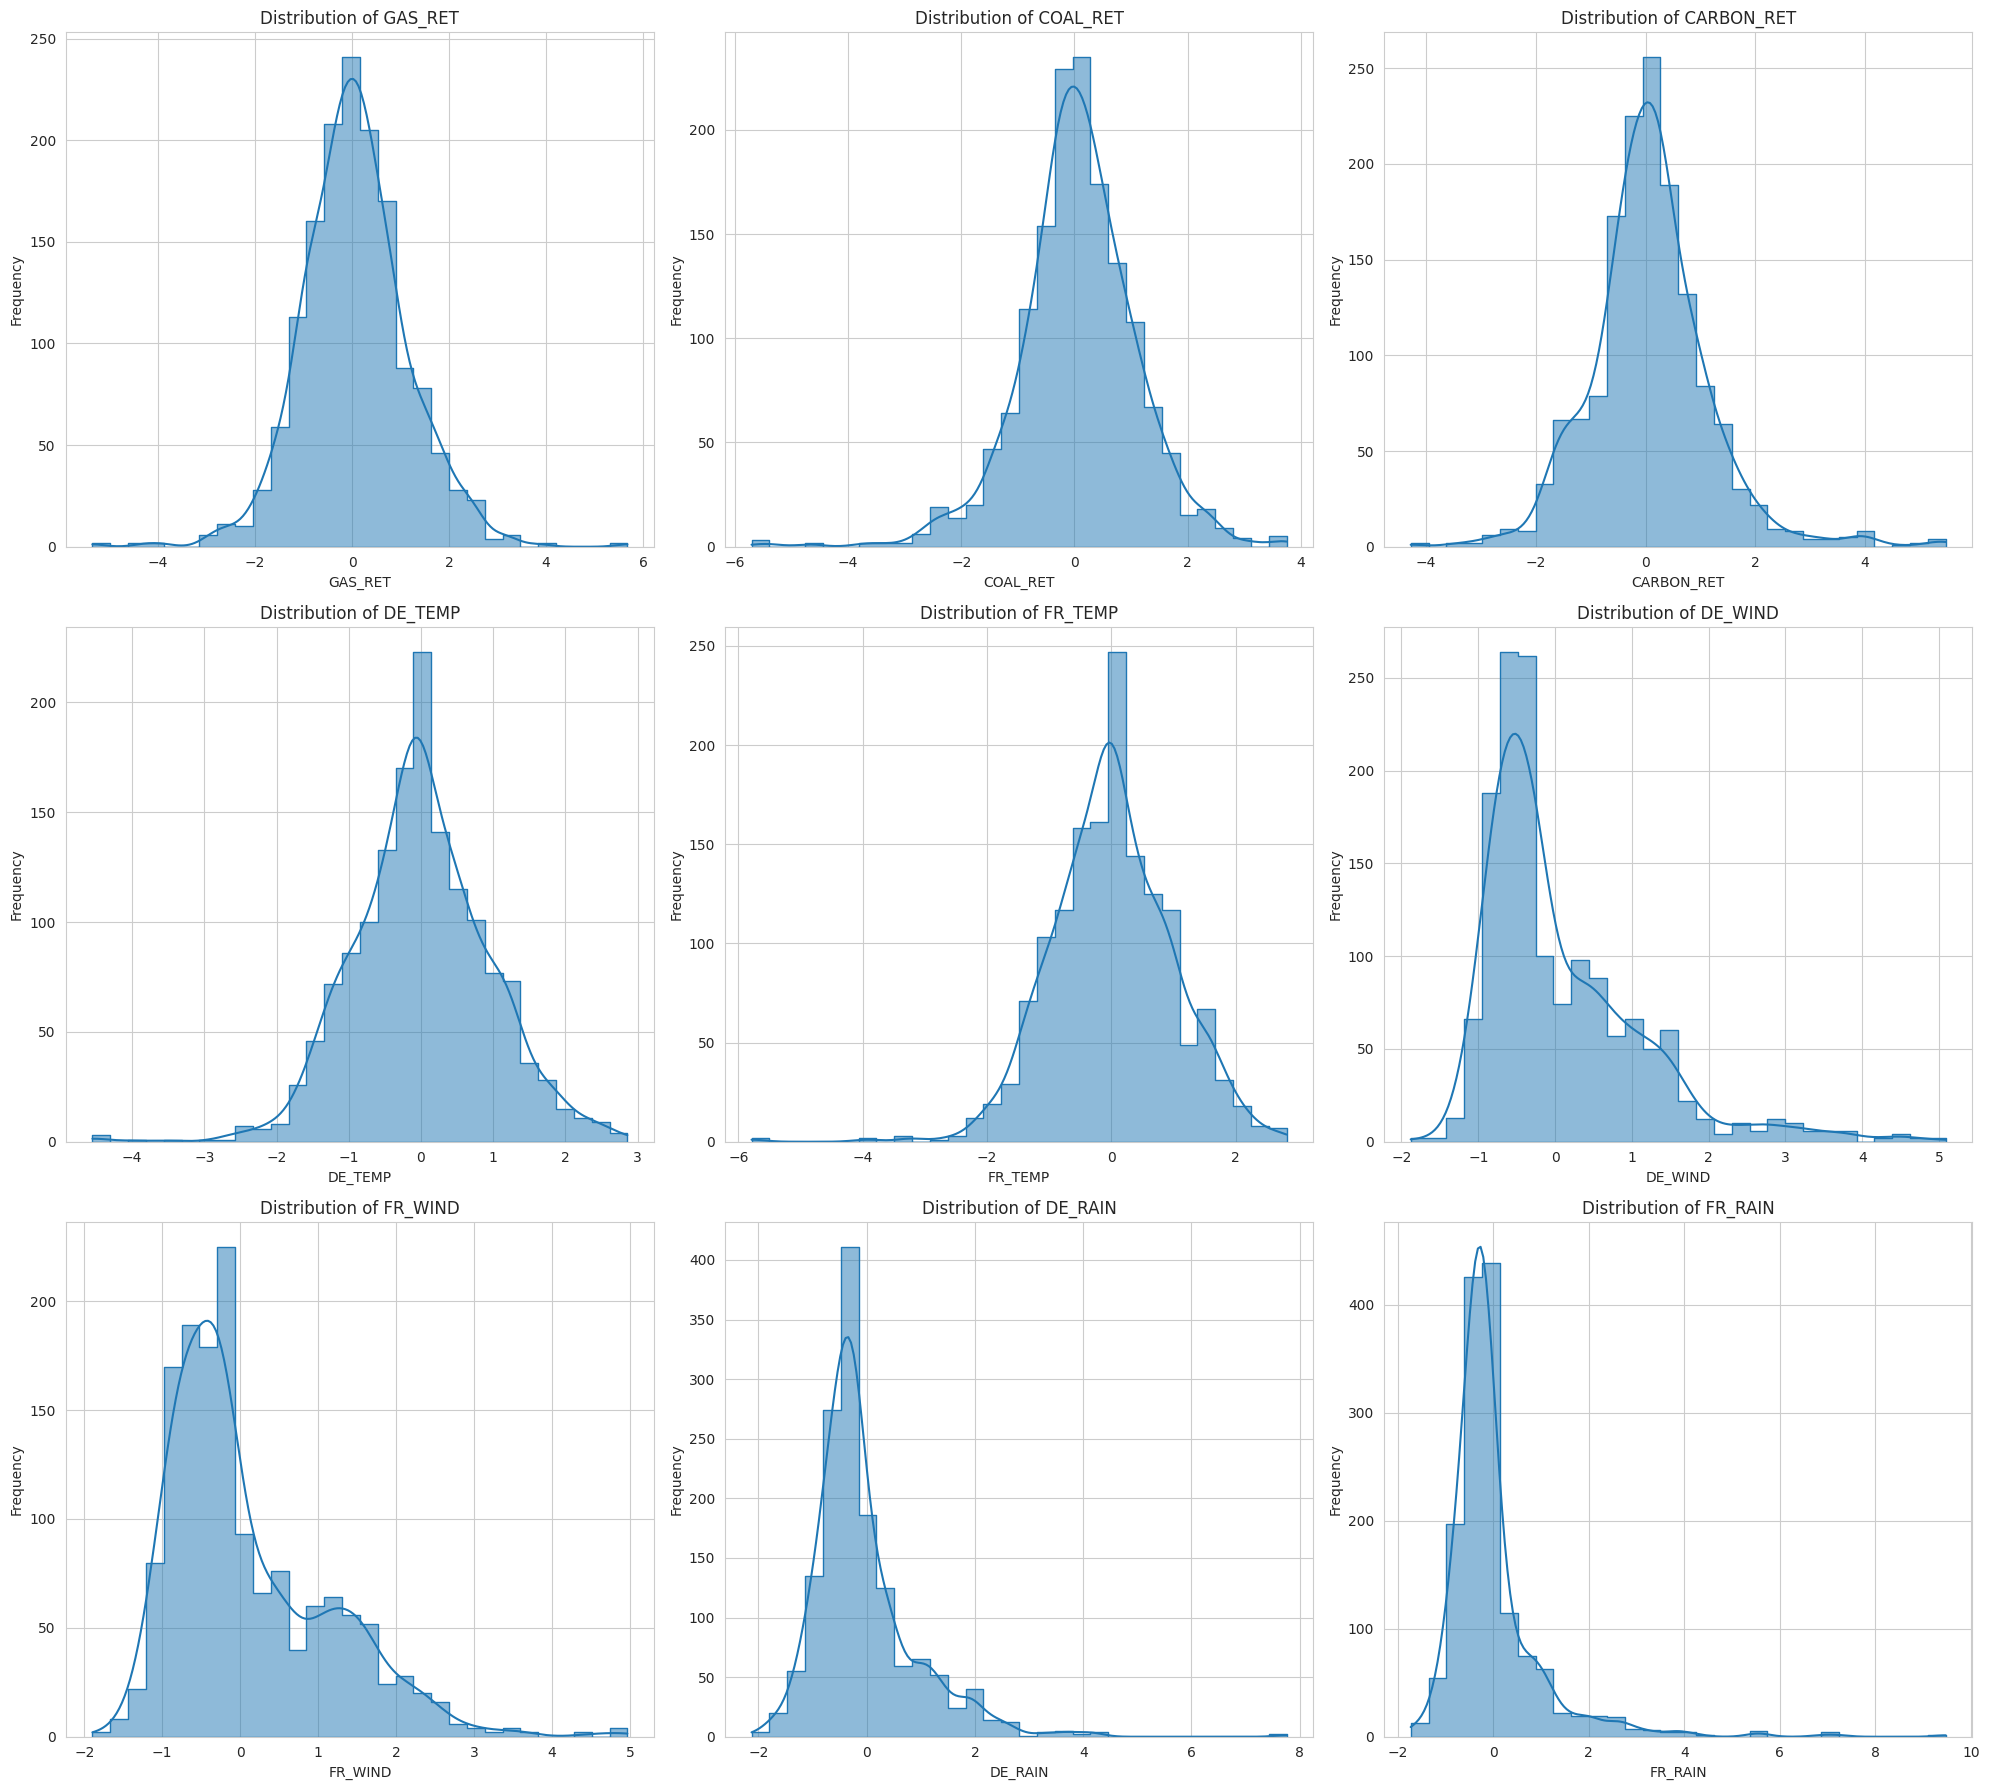

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train is your DataFrame and is already defined

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# List of numerical variables to plot
# numerical_vars = ['DE_TEMP', 'FR_TEMP', 'DE_CONSUMPTION', 'FR_CONSUMPTION', 'GAS_RET', 'COAL_RET', 'CARBON_RET']

# Determine the layout of the subplots
n = len(commodities_weather_columns)
cols = 3  # Number of columns in the grid
rows = n // cols + (n % cols > 0)  # Calculate rows needed, add an extra row if there's a remainder

# Create a figure and a set of subplots
plt.figure(figsize=(20, rows * 6))  # Adjust the size of the entire grid

for i, var in enumerate(commodities_weather_columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(data=training_dataset, x=var, kde=True, bins=30, element='step')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

# Adjust layout for better spacing between plots
plt.tight_layout()
plt.show()


##### Energy production measures

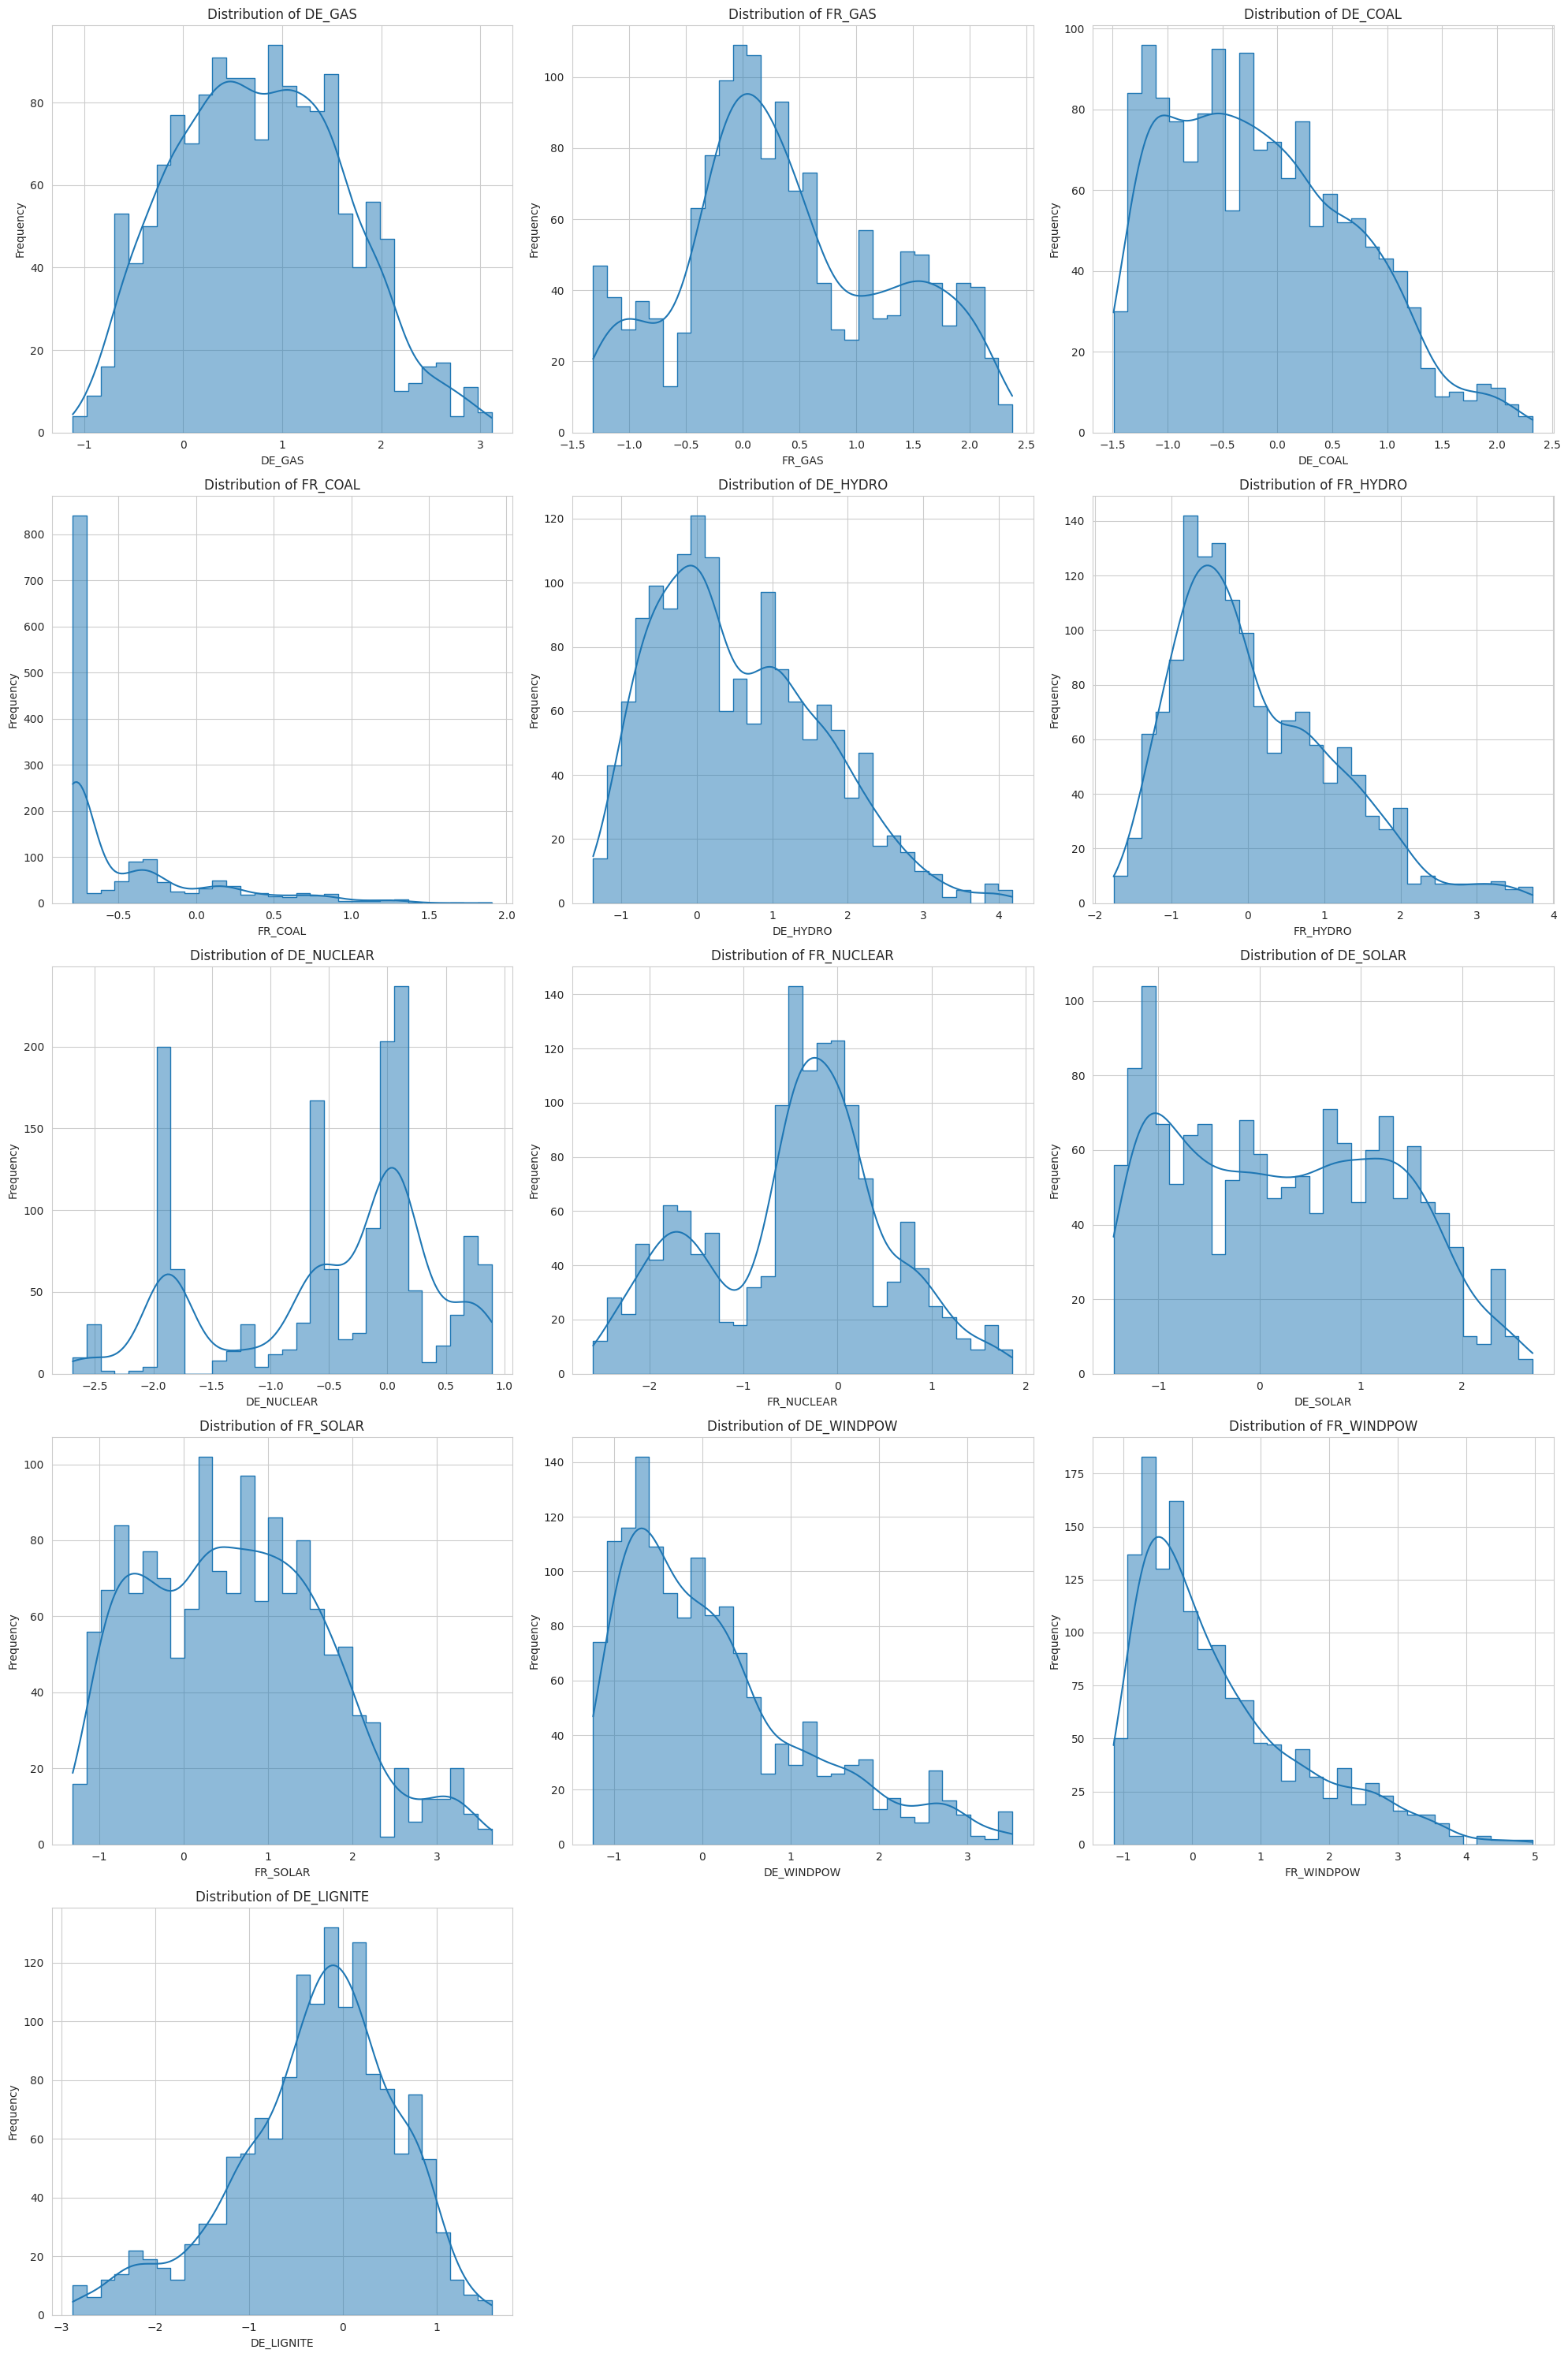

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train is your DataFrame and is already defined

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# List of numerical variables to plot
# numerical_vars = ['DE_TEMP', 'FR_TEMP', 'DE_CONSUMPTION', 'FR_CONSUMPTION', 'GAS_RET', 'COAL_RET', 'CARBON_RET']

# Determine the layout of the subplots
n = len(energy_columns)
cols = 3  # Number of columns in the grid
rows = n // cols + (n % cols > 0)  # Calculate rows needed, add an extra row if there's a remainder

# Create a figure and a set of subplots
plt.figure(figsize=(20, rows * 6))  # Adjust the size of the entire grid

for i, var in enumerate(energy_columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(data=training_dataset, x=var, kde=True, bins=30, element='step')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

# Adjust layout for better spacing between plots
plt.tight_layout()
plt.show()


##### Electricity use metrics

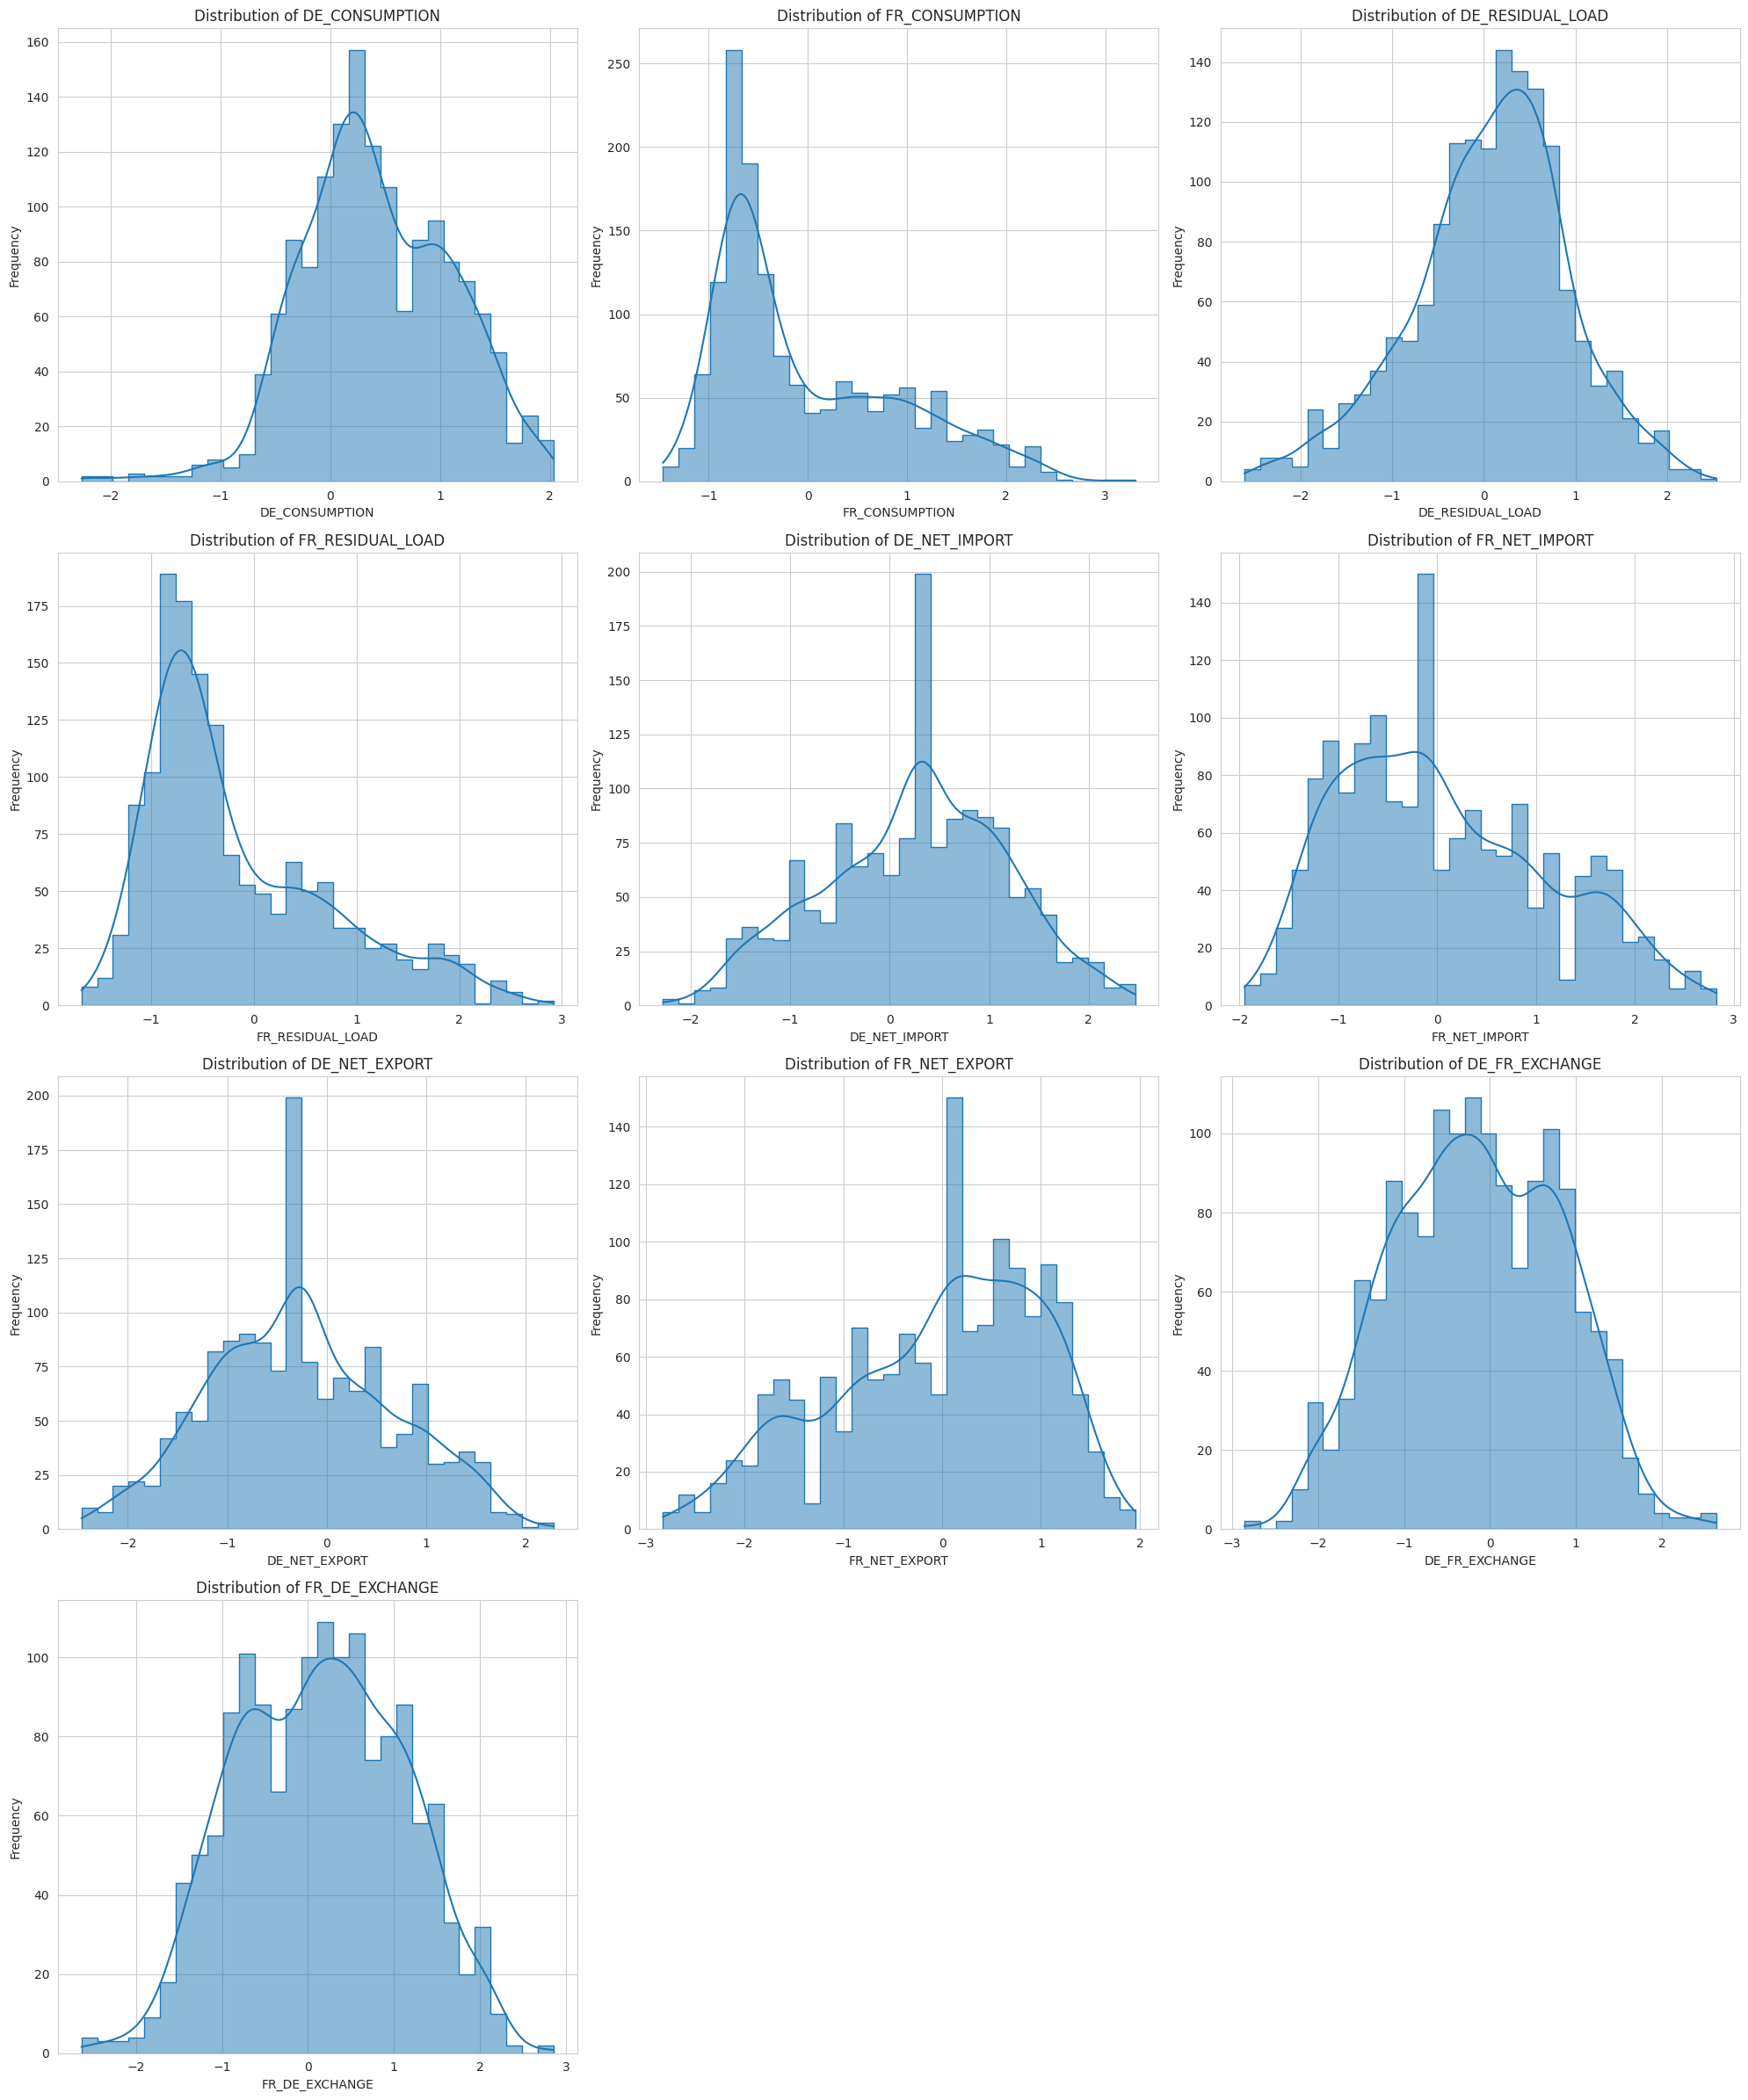

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train is your DataFrame and is already defined

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# List of numerical variables to plot
# numerical_vars = ['DE_TEMP', 'FR_TEMP', 'DE_CONSUMPTION', 'FR_CONSUMPTION', 'GAS_RET', 'COAL_RET', 'CARBON_RET']

# Determine the layout of the subplots
n = len(electricity_columns)
cols = 3  # Number of columns in the grid
rows = n // cols + (n % cols > 0)  # Calculate rows needed, add an extra row if there's a remainder

# Create a figure and a set of subplots
plt.figure(figsize=(20, rows * 6))  # Adjust the size of the entire grid

for i, var in enumerate(electricity_columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(data=training_dataset, x=var, kde=True, bins=30, element='step')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

# Adjust layout for better spacing between plots
plt.tight_layout()
plt.show()

##### Distribution of the Target

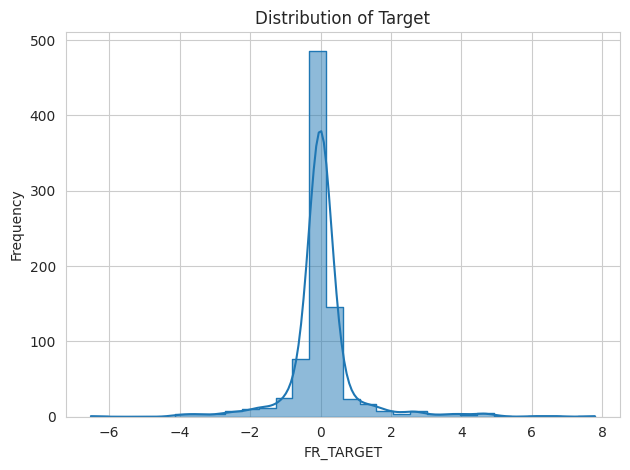

In [16]:
sns.histplot(data=training_dataset[training_dataset['COUNTRY'] == 'FR'], x= 'TARGET' , kde=True, bins=30, element='step')
plt.title(f'Distribution of Target')
plt.xlabel('FR_TARGET')
plt.ylabel('Frequency')

# Adjust layout for better spacing between plots
plt.tight_layout()
plt.show()

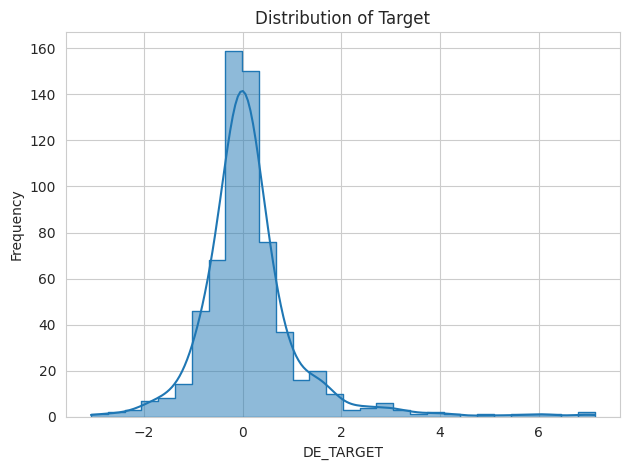

In [17]:
sns.histplot(data=training_dataset[training_dataset['COUNTRY'] == 'DE'], x= 'TARGET' , kde=True, bins=30, element='step')
plt.title(f'Distribution of Target')
plt.xlabel('DE_TARGET')
plt.ylabel('Frequency')

# Adjust layout for better spacing between plots
plt.tight_layout()
plt.show()

### Bivariate Analysis

In [18]:
commodities_weather_target = ['GAS_RET',
                            'COAL_RET',
                            'CARBON_RET',
                            'DE_TEMP',
                            'FR_TEMP',
                            'DE_WIND',
                            'FR_WIND',
                            'DE_RAIN',
                            'FR_RAIN',
                            'TARGET']

energy_target = ['DE_GAS',
                            'FR_GAS',
                            'DE_COAL',
                            'FR_COAL',
                            'DE_HYDRO',
                            'FR_HYDRO',
                            'DE_NUCLEAR',
                            'FR_NUCLEAR',
                            'DE_SOLAR',
                            'FR_SOLAR',
                            'DE_WINDPOW',
                            'FR_WINDPOW',
                            'DE_LIGNITE',
                            'TARGET']

electricity_target = ['DE_CONSUMPTION',
                            'FR_CONSUMPTION',
                            'DE_RESIDUAL_LOAD',
                            'FR_RESIDUAL_LOAD',
                            'DE_NET_IMPORT',
                            'FR_NET_IMPORT',
                            'DE_NET_EXPORT',
                            'FR_NET_EXPORT',
                            'DE_FR_EXCHANGE',
                            'FR_DE_EXCHANGE',
                            'TARGET']

In [19]:
commo_weather_group = training_dataset[commodities_weather_target]
energy_group = training_dataset[energy_target]
electricity_group = training_dataset[electricity_target]

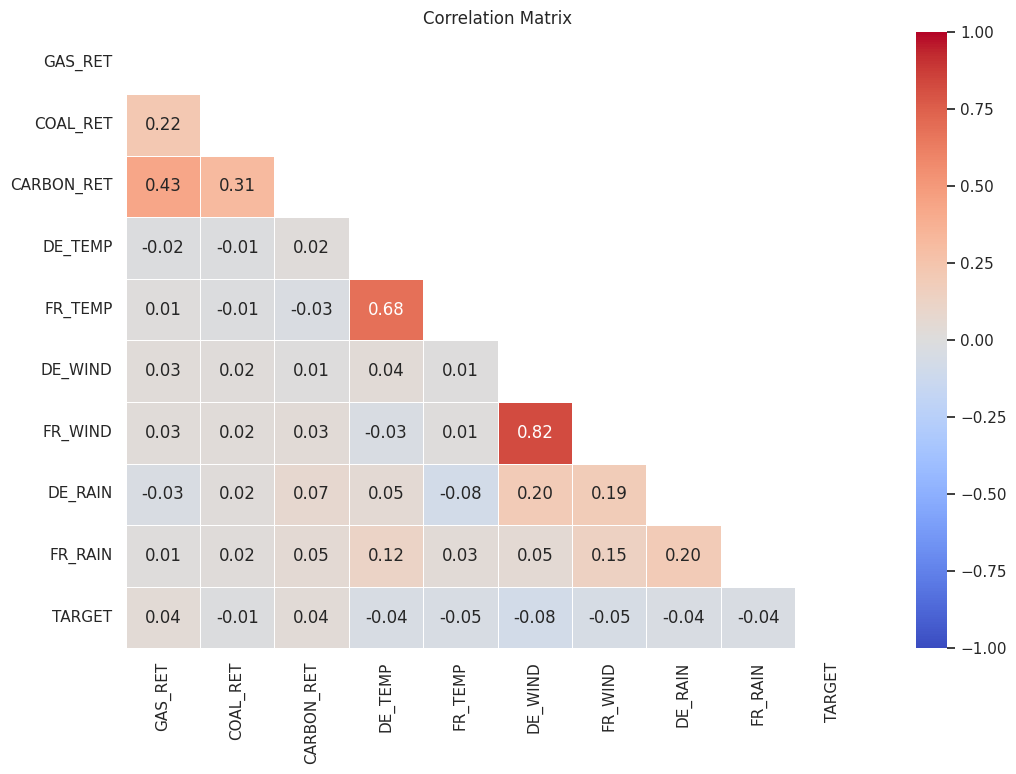

In [20]:
# Calculate the Pearson correlation between numerical values
correlation_matrix = commo_weather_group.corr()

# Configuring the plot
plt.figure(figsize=(12, 8))
sns.set(style="white")  # Configurar el estilo de Seaborn

# Create a mask to only see the inferior half of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, mask=mask, vmin=-1, vmax=1)

# Showing the matrix
plt.title("Correlation Matrix")
plt.show()

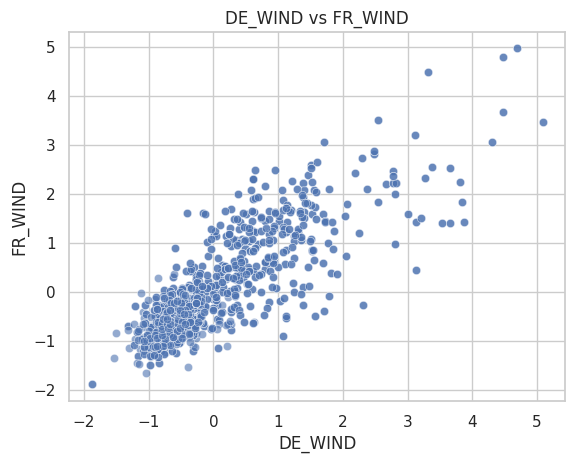

In [ ]:
import seaborn as sns
# Relationship between 'DE_CONSUMPTION' and 'FR_CONSUMPTION'
sns.scatterplot(x='DE_WIND', y='FR_WIND', data=training_dataset, alpha=0.6)
plt.title('DE_WIND vs FR_WIND')
plt.xlabel('DE_WIND')
plt.ylabel('FR_WIND')
plt.show()

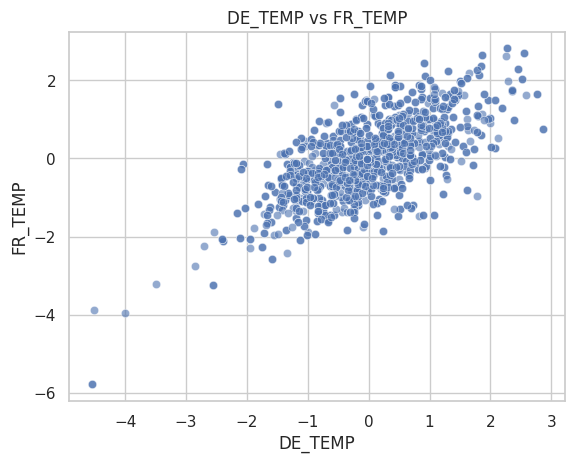

In [ ]:
# Relationship between 'DE_CONSUMPTION' and 'FR_CONSUMPTION'
sns.scatterplot(x='DE_TEMP', y='FR_TEMP', data=training_dataset, alpha=0.6)
plt.title('DE_TEMP vs FR_TEMP')
plt.xlabel('DE_TEMP')
plt.ylabel('FR_TEMP')
plt.show()

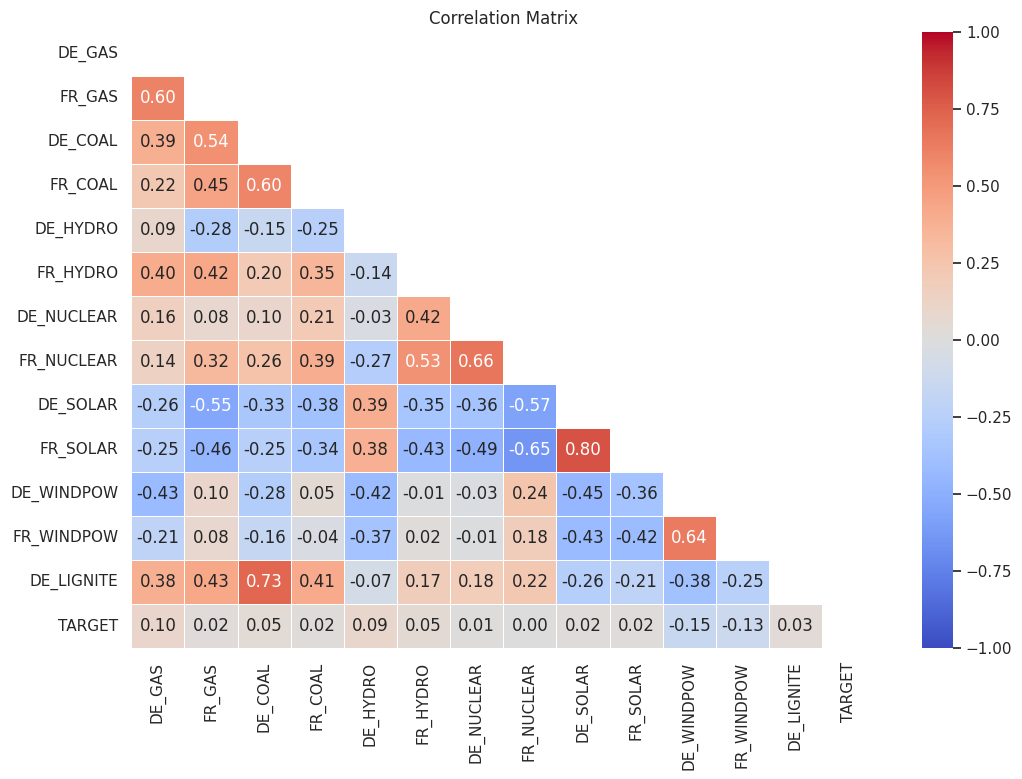

In [ ]:
# Calculate the Pearson correlation between numerical values
correlation_matrix = energy_group.corr()

# Configuring the plot
plt.figure(figsize=(12, 8))
sns.set(style="white")  # Configurar el estilo de Seaborn

# Create a mask to only see the inferior half of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, mask=mask, vmin=-1, vmax=1)

# Showing the matrix
plt.title("Correlation Matrix")
plt.show()

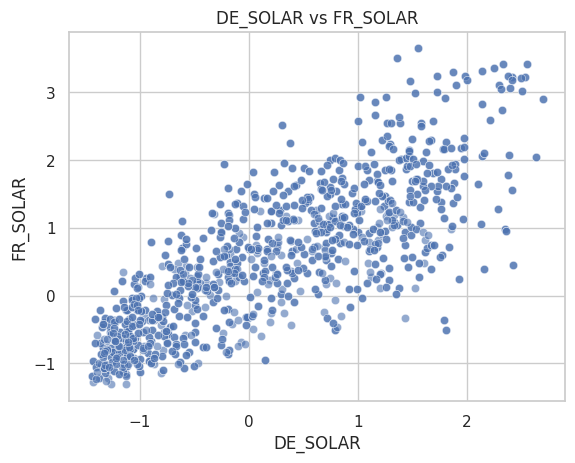

In [ ]:
# Relationship between 'DE_CONSUMPTION' and 'FR_CONSUMPTION'
sns.scatterplot(x='DE_SOLAR', y='FR_SOLAR', data=training_dataset, alpha=0.6)
plt.title('DE_SOLAR vs FR_SOLAR')
plt.xlabel('DE_SOLAR')
plt.ylabel('FR_SOLAR')
plt.show()

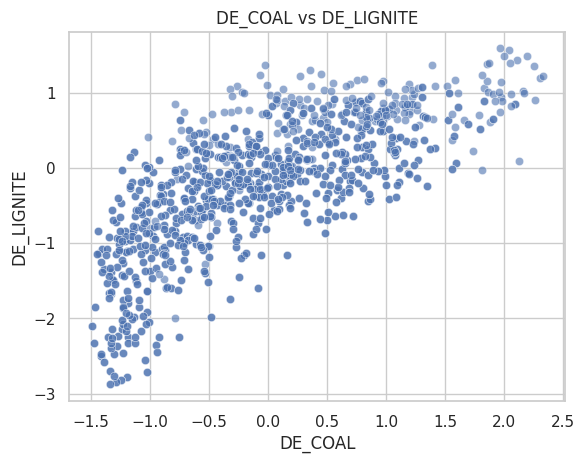

In [ ]:
# Relationship between 'DE_CONSUMPTION' and 'FR_CONSUMPTION'
sns.scatterplot(x='DE_COAL', y='DE_LIGNITE', data=training_dataset, alpha=0.6)
plt.title('DE_COAL vs DE_LIGNITE')
plt.xlabel('DE_COAL')
plt.ylabel('DE_LIGNITE')
plt.show()

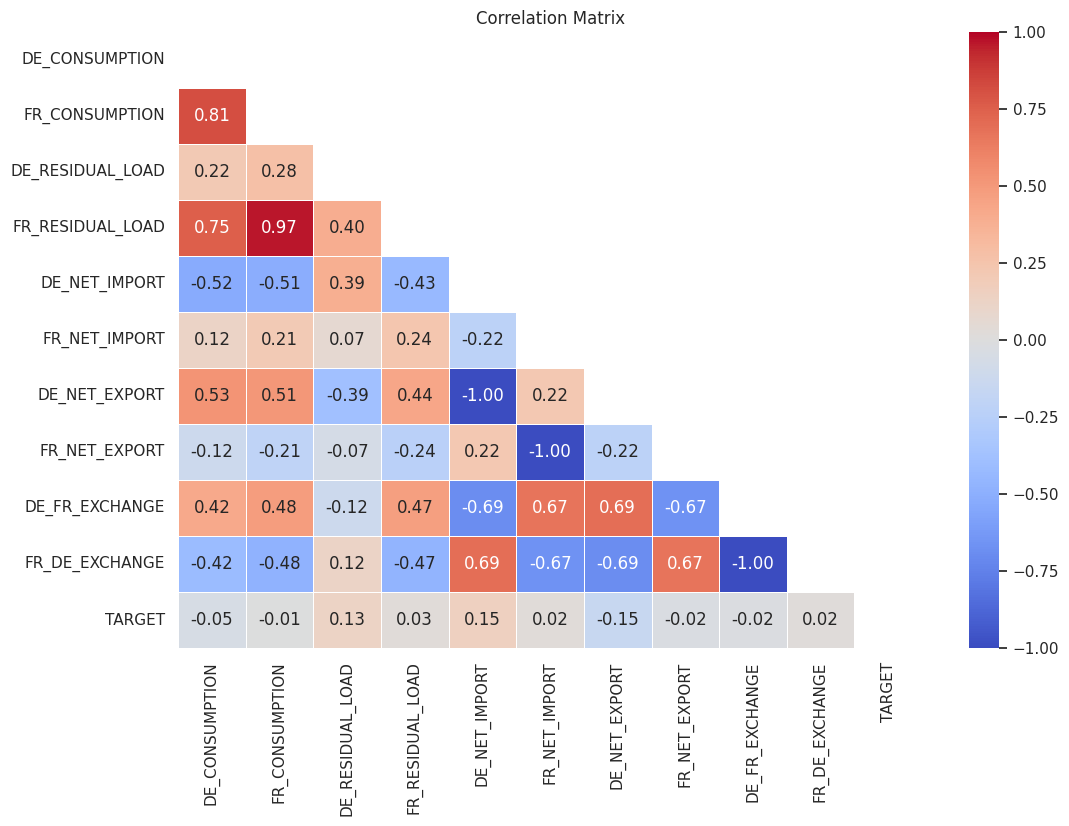

In [ ]:
# Calculate the Pearson correlation between numerical values
correlation_matrix = electricity_group.corr()

# Configuring the plot
plt.figure(figsize=(12, 8))
sns.set(style="white")  # Configurar el estilo de Seaborn

# Create a mask to only see the inferior half of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, mask=mask, vmin=-1, vmax=1)

# Showing the matrix
plt.title("Correlation Matrix")
plt.show()

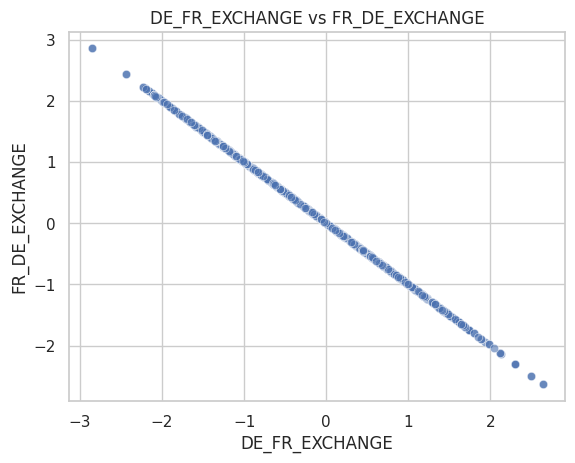

In [ ]:
# Relationship between 'DE_CONSUMPTION' and 'FR_CONSUMPTION'
sns.scatterplot(x='DE_FR_EXCHANGE', y='FR_DE_EXCHANGE', data=training_dataset, alpha=0.6)
plt.title('DE_FR_EXCHANGE vs FR_DE_EXCHANGE')
plt.xlabel('DE_FR_EXCHANGE')
plt.ylabel('FR_DE_EXCHANGE')
plt.show()

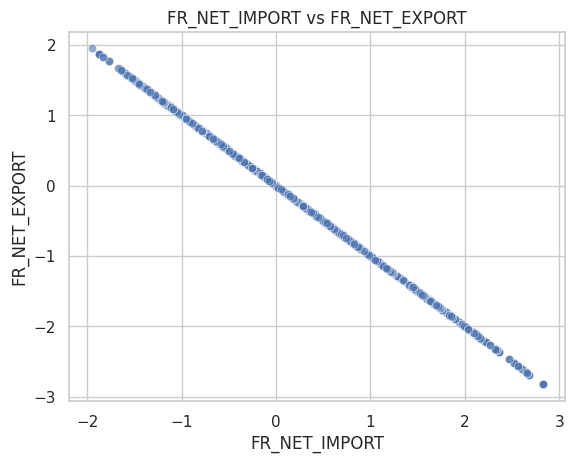

In [ ]:
# Relationship between 'DE_CONSUMPTION' and 'FR_CONSUMPTION'
sns.scatterplot(x='FR_NET_IMPORT', y='FR_NET_EXPORT', data=training_dataset, alpha=0.6)
plt.title('FR_NET_IMPORT vs FR_NET_EXPORT')
plt.xlabel('FR_NET_IMPORT')
plt.ylabel('FR_NET_EXPORT')
plt.show()

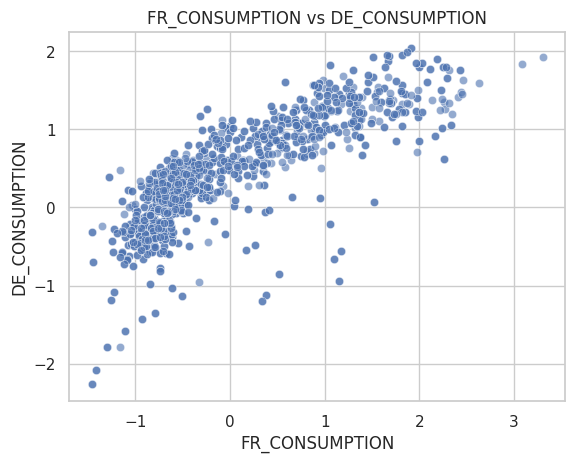

In [ ]:
# Relationship between 'DE_CONSUMPTION' and 'FR_CONSUMPTION'
sns.scatterplot(x='FR_CONSUMPTION', y='DE_CONSUMPTION', data=training_dataset, alpha=0.6)
plt.title('FR_CONSUMPTION vs DE_CONSUMPTION')
plt.xlabel('FR_CONSUMPTION')
plt.ylabel('DE_CONSUMPTION')
plt.show()

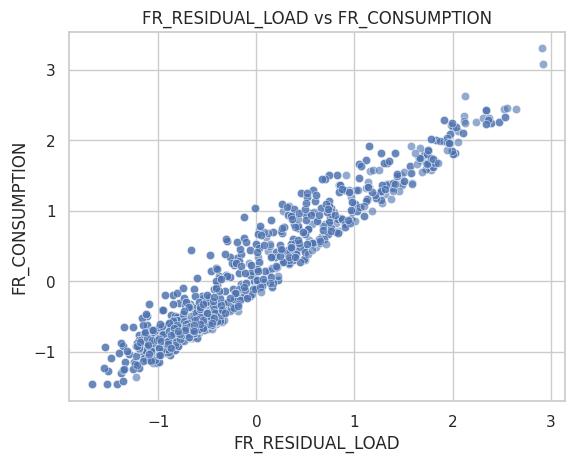

In [ ]:
# Relationship between 'DE_CONSUMPTION' and 'FR_CONSUMPTION'
sns.scatterplot(x='FR_RESIDUAL_LOAD', y='FR_CONSUMPTION', data=training_dataset, alpha=0.6)
plt.title('FR_RESIDUAL_LOAD vs FR_CONSUMPTION')
plt.xlabel('FR_RESIDUAL_LOAD')
plt.ylabel('FR_CONSUMPTION')
plt.show()

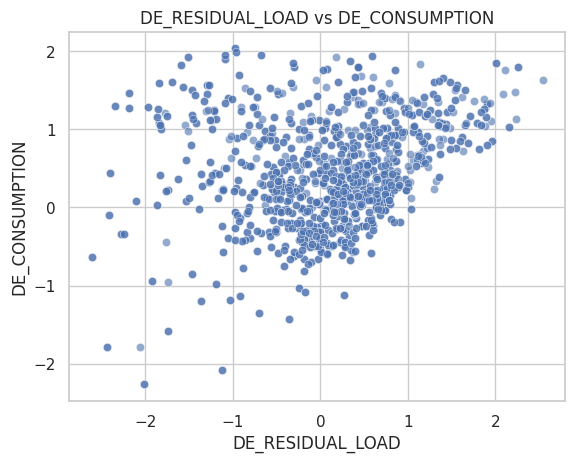

In [ ]:
# Relationship between 'DE_CONSUMPTION' and 'FR_CONSUMPTION'
sns.scatterplot(x='DE_RESIDUAL_LOAD', y='DE_CONSUMPTION', data=training_dataset, alpha=0.6)
plt.title('DE_RESIDUAL_LOAD vs DE_CONSUMPTION')
plt.xlabel('DE_RESIDUAL_LOAD')
plt.ylabel('DE_CONSUMPTION')
plt.show()

## Correlation Analysis per Country Dataset

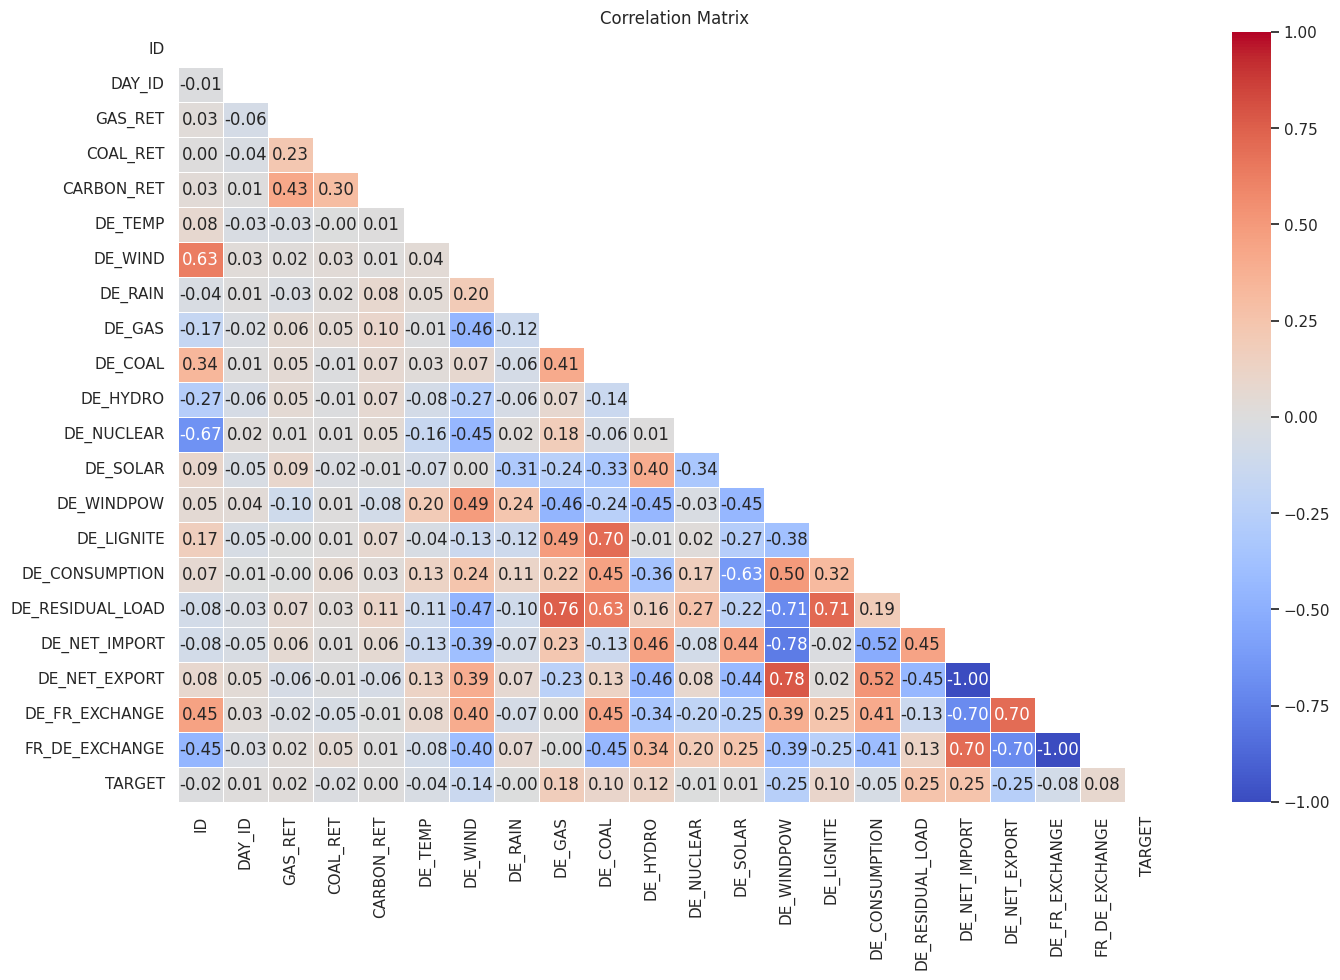

In [21]:
# Calculate the Pearson correlation between numerical values
correlation_matrix = germany_dataset.corr()

# Configuring the plot
plt.figure(figsize=(16, 10))
sns.set(style="white")  # Configurar el estilo de Seaborn

# Create a mask to only see the inferior half of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, mask=mask, vmin=-1, vmax=1)

# Showing the matrix
plt.title("Correlation Matrix")
plt.show()

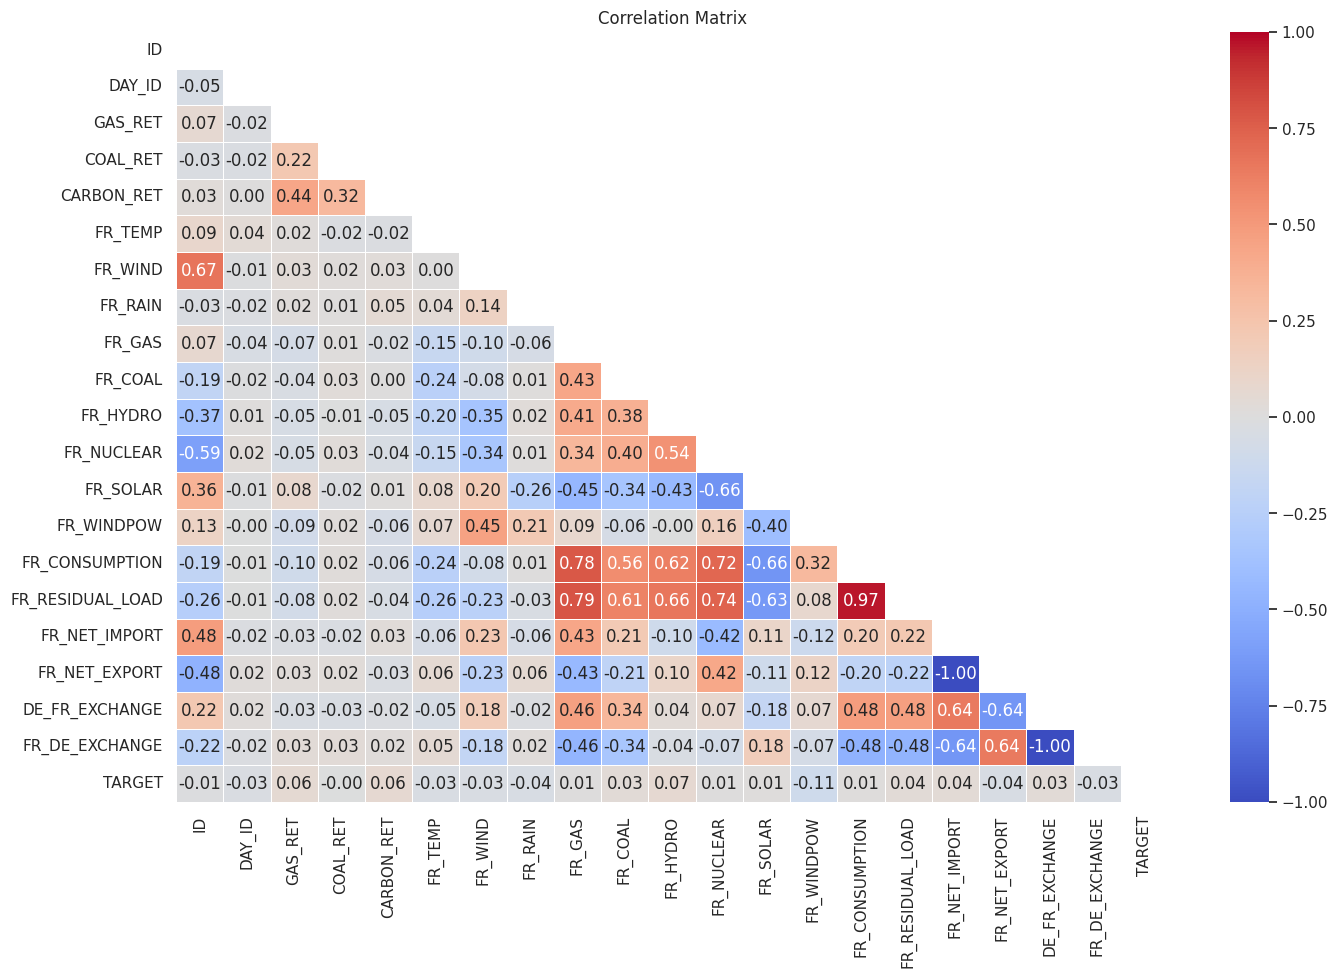

In [22]:
# Calculate the Pearson correlation between numerical values
correlation_matrix = france_dataset.corr()

# Configuring the plot
plt.figure(figsize=(16, 10))
sns.set(style="white")  # Configurar el estilo de Seaborn

# Create a mask to only see the inferior half of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, mask=mask, vmin=-1, vmax=1)

# Showing the matrix
plt.title("Correlation Matrix")
plt.show()

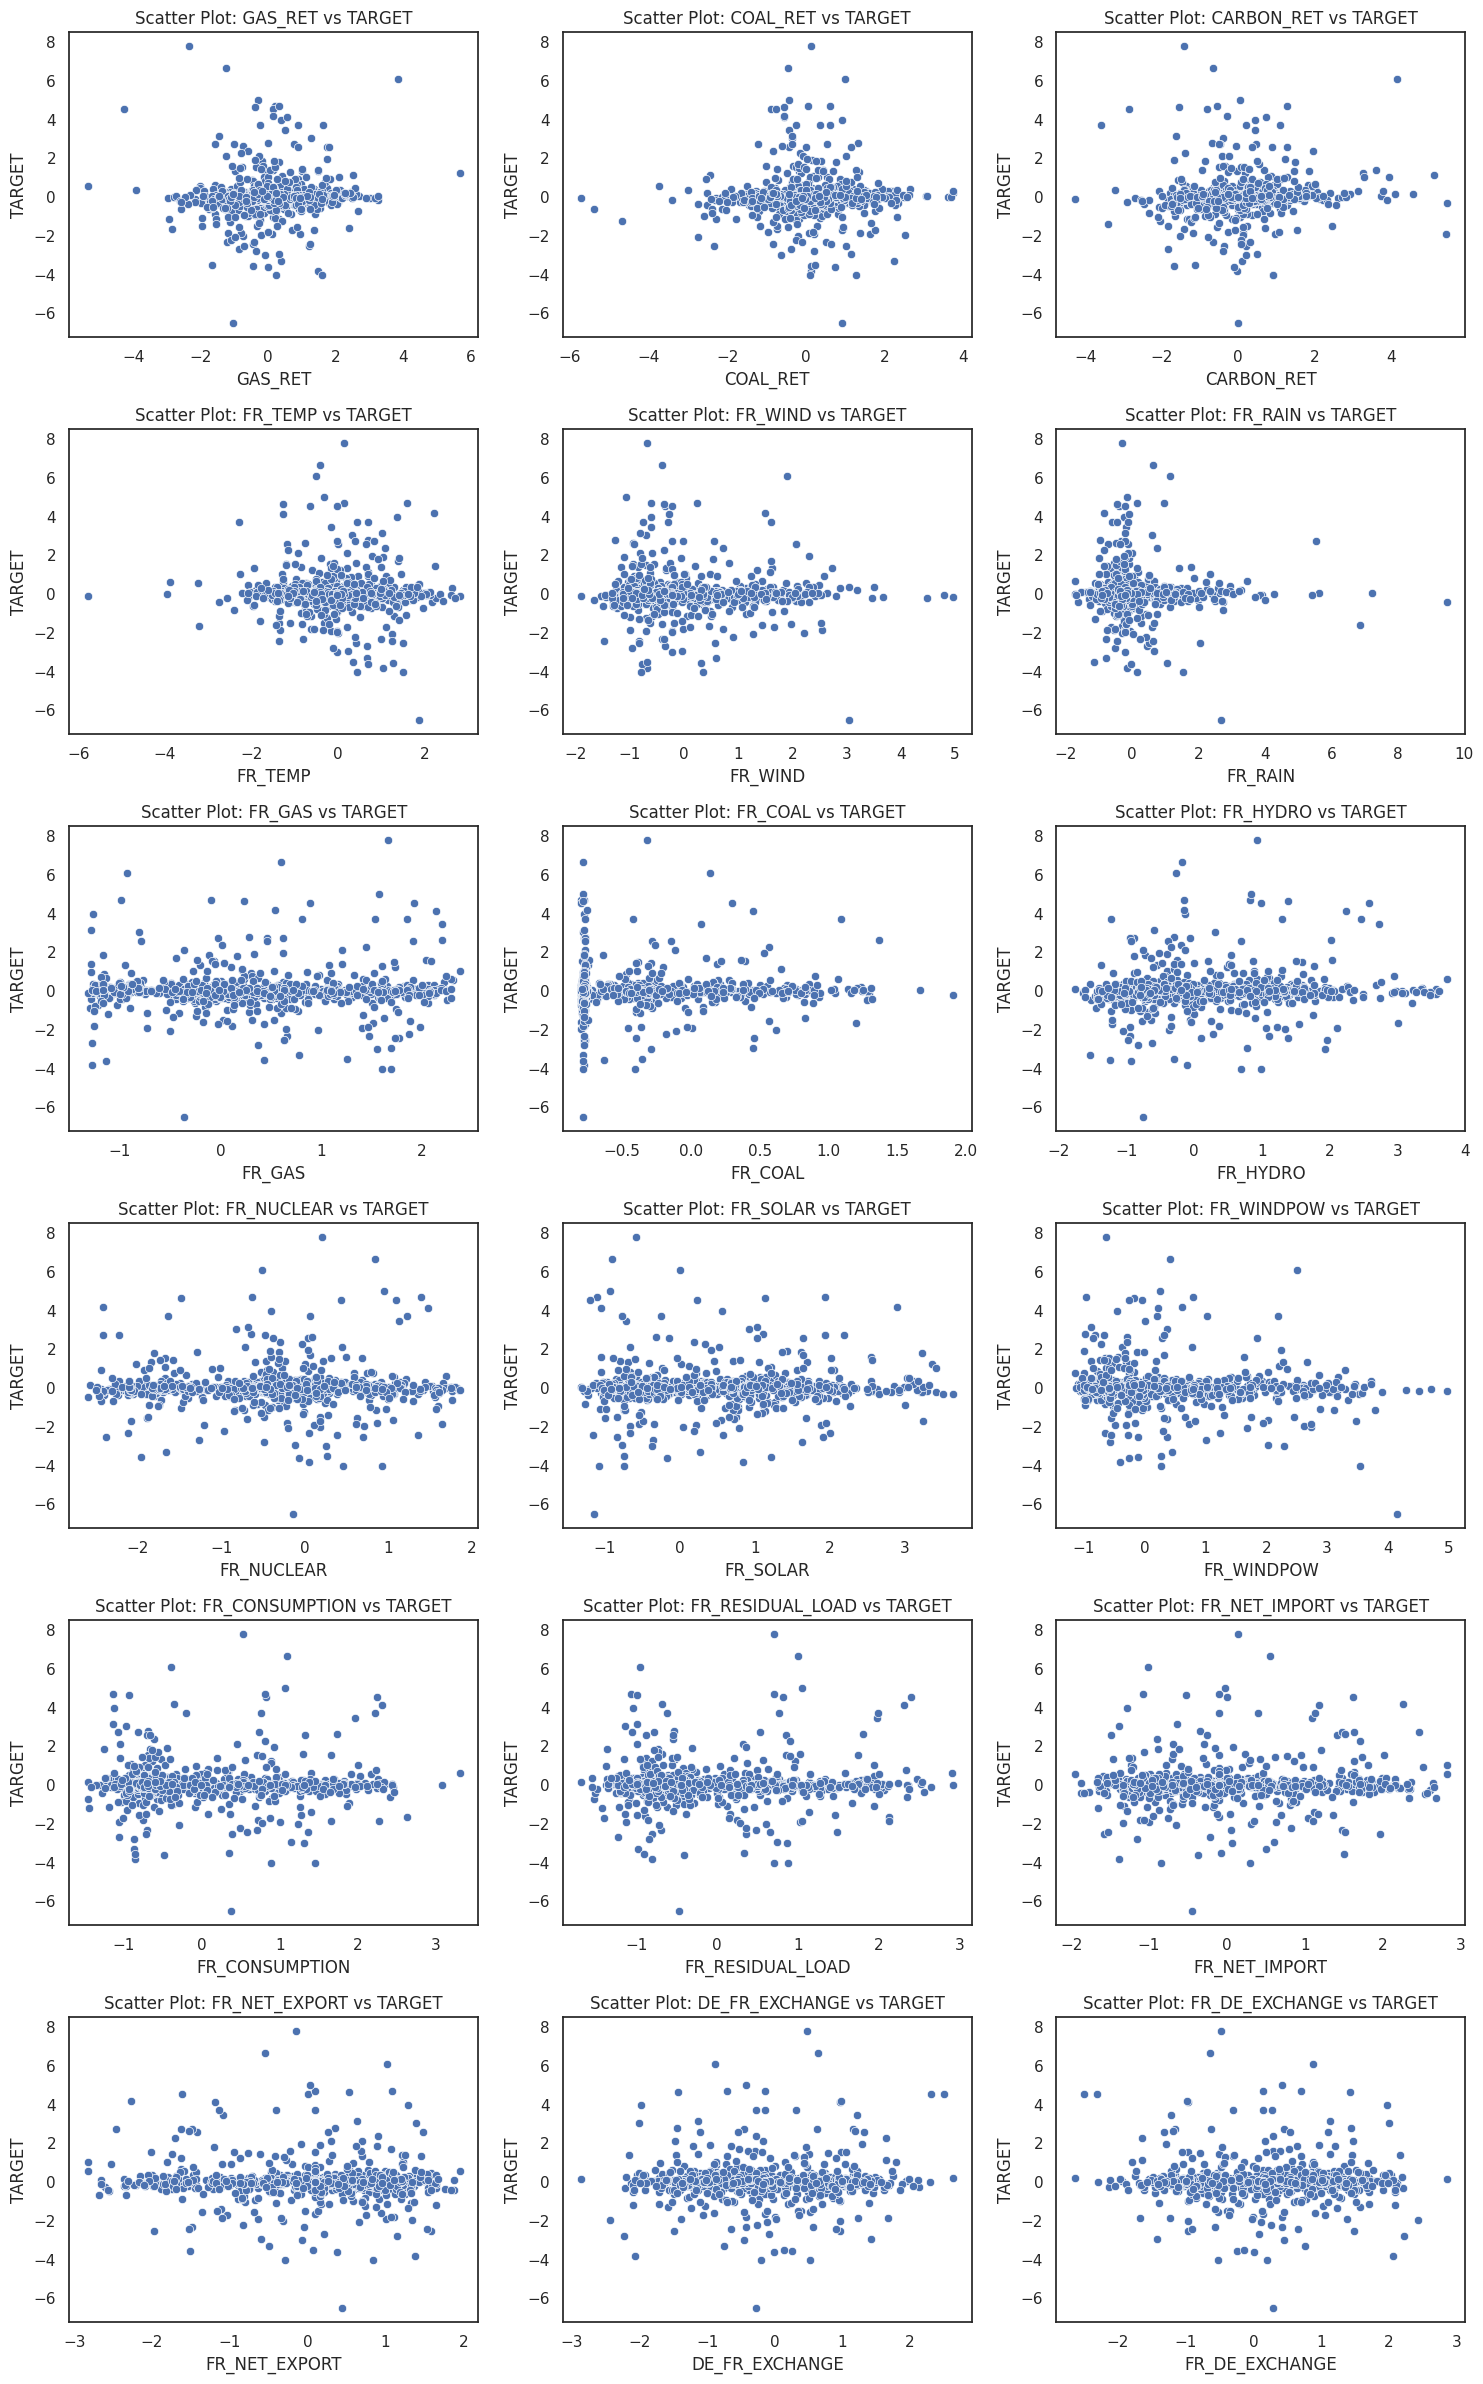

In [23]:
# Suponiendo que "france_dataset" es tu DataFrame y "target_column" es el nombre de la columna objetivo
target_column = 'TARGET'

# Selecciona solo las columnas que quieres incluir en los scatter plots
france_features = ['GAS_RET',
                            'COAL_RET',
                            'CARBON_RET',
                            'FR_TEMP',
                            'FR_WIND',
                            'FR_RAIN',
                            'FR_GAS',
                            'FR_COAL',
                            'FR_HYDRO',
                            'FR_NUCLEAR',
                            'FR_SOLAR',
                            'FR_WINDPOW',
                            'FR_CONSUMPTION',
                            'FR_RESIDUAL_LOAD',
                            'FR_NET_IMPORT',
                            'FR_NET_EXPORT',
                            'DE_FR_EXCHANGE',
                            'FR_DE_EXCHANGE']

# Determina el número de subplots por fila
subplots_per_row = 3  # Puedes ajustar esto según tus necesidades

# Calcula el número total de subplots y la cantidad de filas necesarias
num_features = len(france_features)
num_rows = (num_features - 1) // subplots_per_row + 1

# Crea subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=subplots_per_row, figsize=(15, 4 * num_rows))

# Itera sobre las features y crea scatter plots
for i, feature in enumerate(france_features):
    row, col = divmod(i, subplots_per_row)
    sns.scatterplot(x=france_dataset[feature], y=france_dataset[target_column], ax=axes[row, col])
    axes[row, col].set_title(f'Scatter Plot: {feature} vs {target_column}')

# Ajusta el diseño y muestra el gráfico
plt.tight_layout()
plt.show()